# ecobee DYD dataset - Analysis
This Jupyter notebook is to process the processed ecobee DYD dataset (after running the 01_ecb_preprocessing_practice.ipynb).

In [24]:
# importing libraries.
import pandas as pd
import numpy as np

In [25]:
# Load the processed data
print("Loading processed data")
df = pd.read_csv('processed_us_ecb_metadata.csv')
df.head(2)

Loading processed data


,identifier,account_id,runtime,model,country,province_state,city,building_type,floor_area_sqft,number_floors,building_age_yrs,number_occupants,number_cool_stages,number_heat_stages,allow_comp_with_aux,has_electric,has_heatpump,number_remote_sensors,first_connected
0,f914e61da8d087a22b88f4067acb599543f39b8a,ebc7830136ba2be39f7e4e6090c54382096eddc9,2024-04-03 16:05:13.525793+00:00,ESTWVC,US,AZ,Mesa,detached,10500.0,1.0,120.0,1.0,1,0,True,False,True,1,2022-03-30 23:04:41
1,e7e6ceb26a74edce75dc21e66f0bba2c66cd5cce,ebc7830136ba2be39f7e4e6090c54382096eddc9,2024-04-03 16:05:13.525793+00:00,ecobee3Lite,US,AZ,Mesa,detached,10500.0,1.0,120.0,1.0,1,0,True,False,True,0,2022-04-11 19:29:41


In [26]:
# display basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70888 entries, 0 to 70887
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   identifier             70888 non-null  object 
 1   account_id             70888 non-null  object 
 2   runtime                70888 non-null  object 
 3   model                  70888 non-null  object 
 4   country                70888 non-null  object 
 5   province_state         70888 non-null  object 
 6   city                   70888 non-null  object 
 7   building_type          70888 non-null  object 
 8   floor_area_sqft        70888 non-null  float64
 9   number_floors          70888 non-null  float64
 10  building_age_yrs       70888 non-null  float64
 11  number_occupants       70888 non-null  float64
 12  number_cool_stages     70888 non-null  int64  
 13  number_heat_stages     70888 non-null  int64  
 14  allow_comp_with_aux    70888 non-null  

### Descriptive Analysis

In [27]:
# Descriptive Statistics
print("\nDescriptive Statistics")

# Overall summary statistics
print("\nOverall summary statistics:")
df.describe()


Descriptive Statistics

Overall summary statistics:


,floor_area_sqft,number_floors,building_age_yrs,number_occupants,number_cool_stages,number_heat_stages,number_remote_sensors
count,70888.000000,70888.000000,70888.000000,70888.000000,70888.000000,70888.000000,70888.000000
mean,2668.060828,1.978826,81.852345,2.867213,1.001566,1.056272,1.481548
std,1269.868075,0.822823,160.447472,1.560147,0.362730,0.348361,1.607815
min,200.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2000.000000,1.000000,20.000000,2.000000,1.000000,1.000000,0.000000
50%,2500.000000,2.000000,65.000000,3.000000,1.000000,1.000000,1.000000
75%,3000.000000,3.000000,120.000000,4.000000,1.000000,1.000000,2.000000
max,10500.000000,10.000000,2020.000000,20.000000,2.000000,2.000000,21.000000


In [28]:
# Summary statistics by building type
print("\nSummary statistics by building type:")
df.groupby('building_type')[['floor_area_sqft', 'building_age_yrs']].describe()



Summary statistics by building type:


floor_area_sqft                                           \
                        count         mean          std    min     25%   
building_type                                                            
apartment              2085.0  1493.207674  1119.305855  500.0  1000.0   
condo                  2521.0  1754.468862   838.502114  200.0  1500.0   
detached              49510.0  2827.185316  1246.382121  500.0  2000.0   
loft                    267.0  2055.831461  1374.806517  500.0  1000.0   
multiplex               864.0  2771.932870  1605.073089  500.0  2000.0   
other                  7996.0  2681.037394  1435.502828  250.0  2000.0   
rowhouse               2294.0  2355.823452   968.646423  500.0  1501.0   
semidetached            831.0  2416.796631  1066.416704  500.0  2000.0   
townhouse              4520.0  2174.590265   814.346261  500.0  1500.0   

                                       building_age_yrs             \
                  50%     75%      max            count       mean   
building_type                                                        
apartment      1500.0  1500.0  10000.0           2085.0  95.622062   
condo          1500.0  2000.0  10500.0           2521.0  80.153907   
detached       2500.0  3500.0  10500.0          49510.0  81.190527   
loft           2000.0  2500.0  10000.0            267.0  82.183521   
multiplex      2500.0  3500.0  10000.0            864.0  92.831019   
other          2500.0  3000.0  10500.0           7996.0  87.011881   
rowhouse       2000.0  3000.0  10000.0           2294.0  77.752398   
semidetached   2000.0  3000.0  10000.0            831.0  75.409146   
townhouse      2000.0  2500.0  10000.0           4520.0  75.717035   

                                                            
                      std  min   25%    50%    75%     max  
building_type                                               
apartment      208.016084  1.0  20.0  120.0  120.0  2020.0  
condo          155.639959  1.0  20.0   52.0  120.0  2020.0  
detached       157.433589  1.0  20.0   65.0  120.0  2020.0  
loft           172.476238  1.0  20.0   65.0  120.0  2020.0  
multiplex      199.409660  1.0  25.0   83.0  120.0  2020.0  
other          176.216073  1.0  22.0   70.0  120.0  2020.0  
rowhouse       135.046427  1.0  20.0   69.0  120.0  2020.0  
semidetached   125.440347  1.0  20.0   62.0  120.0  2020.0  
townhouse      148.906177  1.0  20.0   48.0  120.0  2020.0

In [29]:
# Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = df[['floor_area_sqft', 'building_age_yrs', 'number_floors']].corr()
print(correlation_matrix)


Correlation Matrix:
                  floor_area_sqft  building_age_yrs  number_floors
floor_area_sqft          1.000000         -0.012840       0.332951
building_age_yrs        -0.012840          1.000000       0.011471
number_floors            0.332951          0.011471       1.000000


In [30]:
# Exercise - Choose rows from AZ and print their summary statistics of floor_area_sqft, number_floor, number_occupant
print("\nArizona Data Analysis")

# Select rows where the state is Arizona (AZ)
az_data = df[df['province_state'] == 'AZ']

# Check if there are any rows for Arizona
if len(az_data) > 0:
    # List of columns we want to analyze
    columns_to_analyze = ['floor_area_sqft', 'number_floors', 'number_occupants']
    
    # Calculate and print summary statistics for the specified columns
    print("Summary Statistics for Arizona Buildings:")
    print(az_data[columns_to_analyze].describe())
else:
    print("No data available for Arizona (AZ)")


Arizona Data Analysis
Summary Statistics for Arizona Buildings:
       floor_area_sqft  number_floors  number_occupants
count      2418.000000    2418.000000       2418.000000
mean       2701.540116       1.342432          2.877585
std        1304.478196       0.497601          1.927714
min         500.000000       1.000000          1.000000
25%        2000.000000       1.000000          2.000000
50%        2500.000000       1.000000          2.000000
75%        3000.000000       2.000000          4.000000
max       10500.000000       3.000000         20.000000


In [31]:
# Exercise - Count the number of ecobee thermostats in each state and find out (1) State with the most ecobee thermostats and (2) State with the least ecobee thermostats
# Hint #1: Identify the data type after using value_counts()
# Hint #2: Use idxmax function.

print("\nCount of Smart Thermostats by State")

# Group by state and count the number of thermostats
state_counts = df['province_state'].value_counts()

# Display the counts
print("Number of smart thermostats in each state:")
print(state_counts)

# Calculate some statistics
total_thermostats = state_counts.sum()
max_state = state_counts.idxmax() #pandas.DataFrame.idxmax: Return index of first occurrence of maximum over requested axis
min_state = state_counts.idxmin() #pandas.DataFrame.idxmin: Return index of first occurrence of minimum over requested axis

print(f"\nTotal number of thermostats: {total_thermostats}")
print(f"State with the most thermostats: {max_state} ({state_counts[max_state]})")
print(f"State with the least thermostats: {min_state} ({state_counts[min_state]})")



Count of Smart Thermostats by State
Number of smart thermostats in each state:
province_state
TX       6729
CA       6091
FL       4509
IL       3768
GA       2918
MI       2797
NC       2787
AZ       2418
VA       2275
MA       2190
NY       2183
CO       2148
PA       1983
OH       1979
MD       1866
MN       1789
NJ       1770
WI       1549
IN       1524
WA       1524
MO       1491
TN       1406
SC       1253
NV       1225
UT       1187
OR       1039
AL        940
CT        811
KY        598
KS        570
LA        568
IA        562
OK        561
AR        452
ID        432
NH        418
NE        350
MS        308
NM        301
VT        223
RI        207
WV        188
DE        169
ME        161
DC        158
MT        131
SD        104
AK         87
ND         87
WY         68
HI         21
PR         10
US-NC       2
US-SD       1
GU          1
US-PA       1
Name: count, dtype: int64

Total number of thermostats: 70888
State with the most thermostats: TX (6729)
State with the l

In [32]:
# Excercise - Building Types in Arizona and California. Display the results and save them as csv files.
print("\nBuilding Types in Arizona and California")

# Filter data for Arizona and California
az_ca_data = df[df['province_state'].isin(['AZ', 'CA'])]

# Count building types for each state
az_building_types = az_ca_data[az_ca_data['province_state'] == 'AZ']['building_type'].value_counts()
ca_building_types = az_ca_data[az_ca_data['province_state'] == 'CA']['building_type'].value_counts()

# Display results
print("Building Types in Arizona:")
print(az_building_types)
print("\nBuilding Types in California:")
print(ca_building_types)

# Save the results to CSV files
az_building_types.to_csv('arizona_building_types.csv', header=True)
ca_building_types.to_csv('california_building_types.csv', header=True)

print("\nResults saved to 'arizona_building_types.csv' and 'california_building_types.csv'")



Building Types in Arizona and California
Building Types in Arizona:
building_type
detached        1855
other            220
townhouse         93
rowhouse          85
condo             71
apartment         48
semidetached      26
multiplex         15
loft               5
Name: count, dtype: int64

Building Types in California:
building_type
detached        4304
other            412
townhouse        405
condo            339
rowhouse         263
apartment        198
semidetached      87
multiplex         54
loft              29
Name: count, dtype: int64

Results saved to 'arizona_building_types.csv' and 'california_building_types.csv'


### Data Visualization

In [33]:
# import visualization libararies
import matplotlib.pyplot as plt

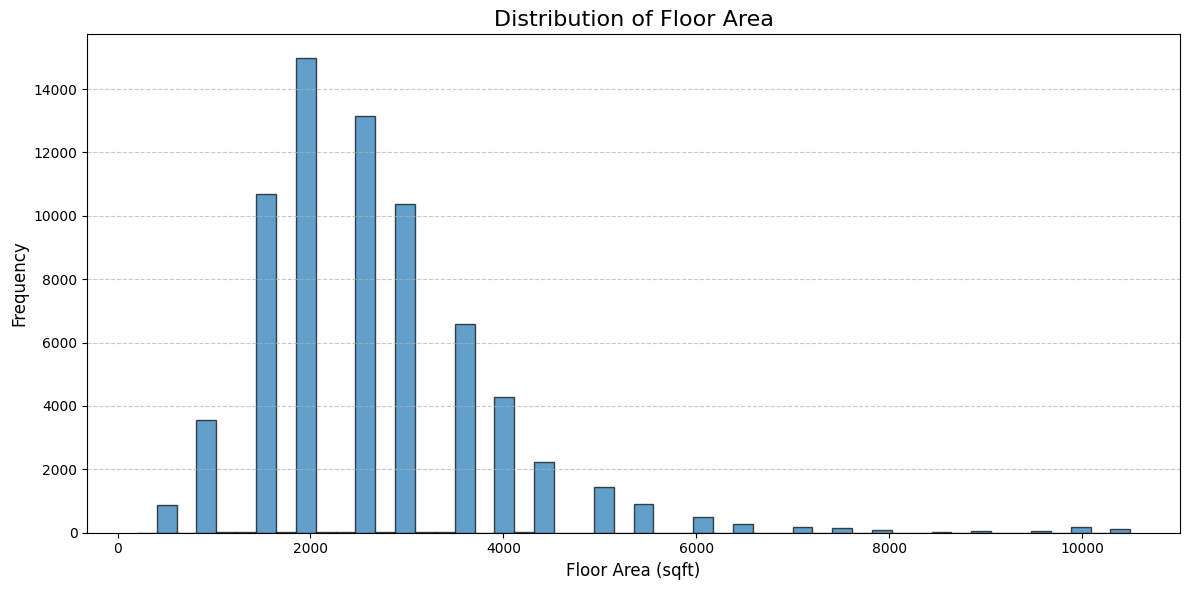

In [34]:
# Distribution of Floor Area
# Create a new figure with specified size
plt.figure(figsize=(12, 6))

# Create a histogram of floor areas
plt.hist(df['floor_area_sqft'],  # Data to plot
         bins=50,  # Number of bins (bars) in the histogram
         edgecolor='black',  # Color of the edges of the bars
         alpha=0.7)  # Transparency of the bars

# Customize the plot
plt.title('Distribution of Floor Area', fontsize=16)  # Set the title and its font size
plt.xlabel('Floor Area (sqft)', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()


6. Adoption Trend of Ecobee Smart Thermostats in Arizona


/var/folders/qb/x1m3nb652kxbx7h68wz_07mm0000gn/T/ipykernel_50232/944445111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  az_data['first_connected'] = pd.to_datetime(az_data['first_connected'])
/var/folders/qb/x1m3nb652kxbx7h68wz_07mm0000gn/T/ipykernel_50232/944445111.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  az_data.sort_index(inplace=True)
/var/folders/qb/x1m3nb652kxbx7h68wz_07mm0000gn/T/ipykernel_50232/944445111.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_installations = az

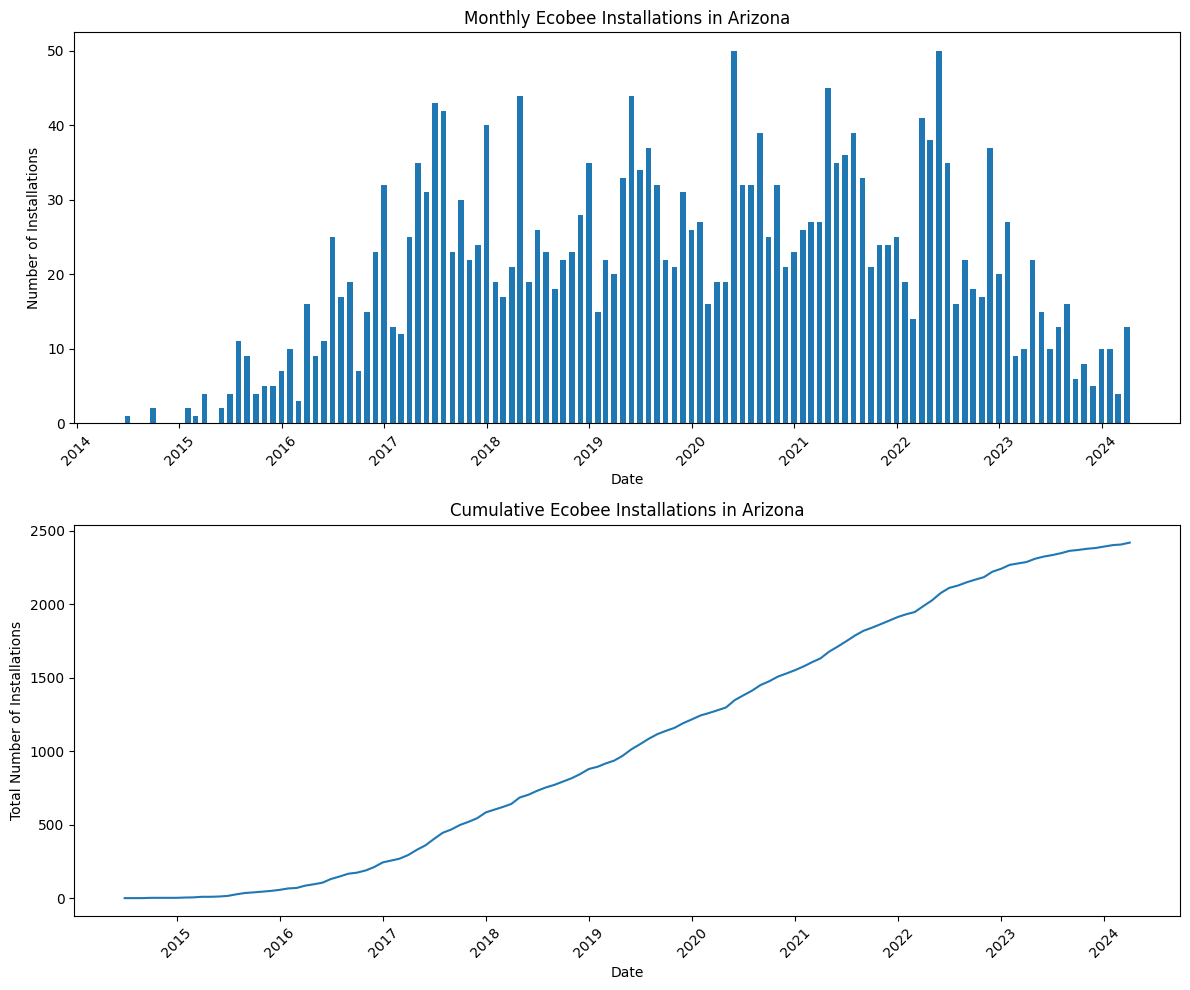

Total number of installations in Arizona: 2418
Date of first installation: 2014-06-26
Date of last installation: 2024-03-19
Month with most installations: 2020-05 (50 installations)


In [35]:
# Adoption trend of ecobee smart thermostats in Arizona - using the 'first_connected' column.
print("\n6. Adoption Trend of Ecobee Smart Thermostats in Arizona")

if len(az_data) > 0:
    # Convert 'first_connected' to datetime
    az_data['first_connected'] = pd.to_datetime(az_data['first_connected'])
    
    # Set 'first_connected' as the index
    az_data.set_index('first_connected', inplace=True)
    
    # Sort the data by date
    az_data.sort_index(inplace=True)
    
    # Resample the data by month and count the number of new installations
    monthly_installations = az_data.resample('M').size() #pandas.DataFrame.resample: Convenience method for frequency conversion and resampling of time series.
    
    # Calculate cumulative installations
    cumulative_installations = monthly_installations.cumsum() #pandas.DataFrame.cumsum: Returns a DataFrame or Series of the same size containing the cumulative sum.
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10)) 
    #matplotlib.pyplot.subplots: This utility wrapper makes it convenient to create common layouts of subplots.
    # arguments: nrows, ncols, sharex, sharey, ...
    
    # Plot monthly installations
    ax1.bar(monthly_installations.index, monthly_installations.values, width=20)
    ax1.set_title('Monthly Ecobee Installations in Arizona')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Installations')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot cumulative installations
    ax2.plot(cumulative_installations.index, cumulative_installations.values)
    ax2.set_title('Cumulative Ecobee Installations in Arizona')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Total Number of Installations')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"Total number of installations in Arizona: {len(az_data)}")
    print(f"Date of first installation: {az_data.index.min().date()}")
    print(f"Date of last installation: {az_data.index.max().date()}")
    print(f"Month with most installations: {monthly_installations.idxmax().strftime('%Y-%m')} "
          f"({monthly_installations.max()} installations)")
else:
    print("No data available for Arizona (AZ)")


6. Adoption Trend of Ecobee Smart Thermostats in Texas


/var/folders/qb/x1m3nb652kxbx7h68wz_07mm0000gn/T/ipykernel_50232/1421425803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_data['first_connected'] = pd.to_datetime(tx_data['first_connected'])
/var/folders/qb/x1m3nb652kxbx7h68wz_07mm0000gn/T/ipykernel_50232/1421425803.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_data.sort_index(inplace=True)
/var/folders/qb/x1m3nb652kxbx7h68wz_07mm0000gn/T/ipykernel_50232/1421425803.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_installations =

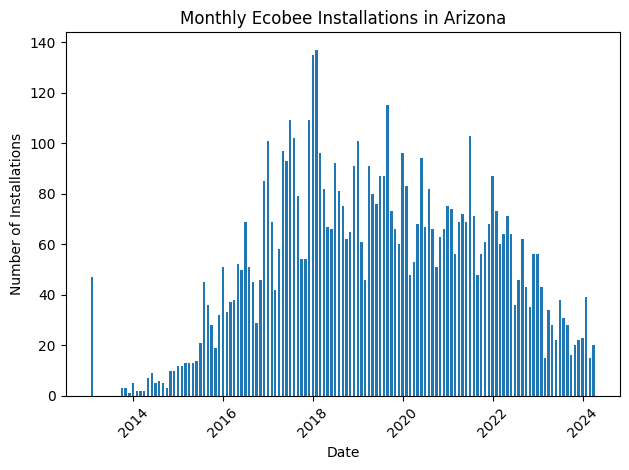

Total number of installations in Arizona: 6729
Date of first installation: 2013-01-01
Date of last installation: 2024-03-31
Month with most installations: 2018-01 (137 installations)


In [36]:
# Exercise - Adoption trend of ecobee smart thermostats in Texas: Plot monthly installation
print("\n6. Adoption Trend of Ecobee Smart Thermostats in Texas")

# Select rows where the state is Texas (TX)
tx_data = df[df['province_state'] == 'TX']

if len(tx_data) > 0:
    # Convert 'first_connected' to datetime
    tx_data['first_connected'] = pd.to_datetime(tx_data['first_connected'])
    
    # Set 'first_connected' as the index
    tx_data.set_index('first_connected', inplace=True)
    
    # Sort the data by date
    tx_data.sort_index(inplace=True)
    
    # Resample the data by month and count the number of new installations
    monthly_installations = tx_data.resample('M').size() #pandas.DataFrame.resample: Convenience method for frequency conversion and resampling of time series.
    
    # Plot monthly installations
    plt.bar(monthly_installations.index, monthly_installations.values, width=20)
    plt.title('Monthly Ecobee Installations in Arizona')
    plt.xlabel('Date')
    plt.ylabel('Number of Installations')
    plt.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"Total number of installations in Arizona: {len(tx_data)}")
    print(f"Date of first installation: {tx_data.index.min().date()}")
    print(f"Date of last installation: {tx_data.index.max().date()}")
    print(f"Month with most installations: {monthly_installations.idxmax().strftime('%Y-%m')} "
          f"({monthly_installations.max()} installations)")
else:
    print("No data available for Texas (TX)")

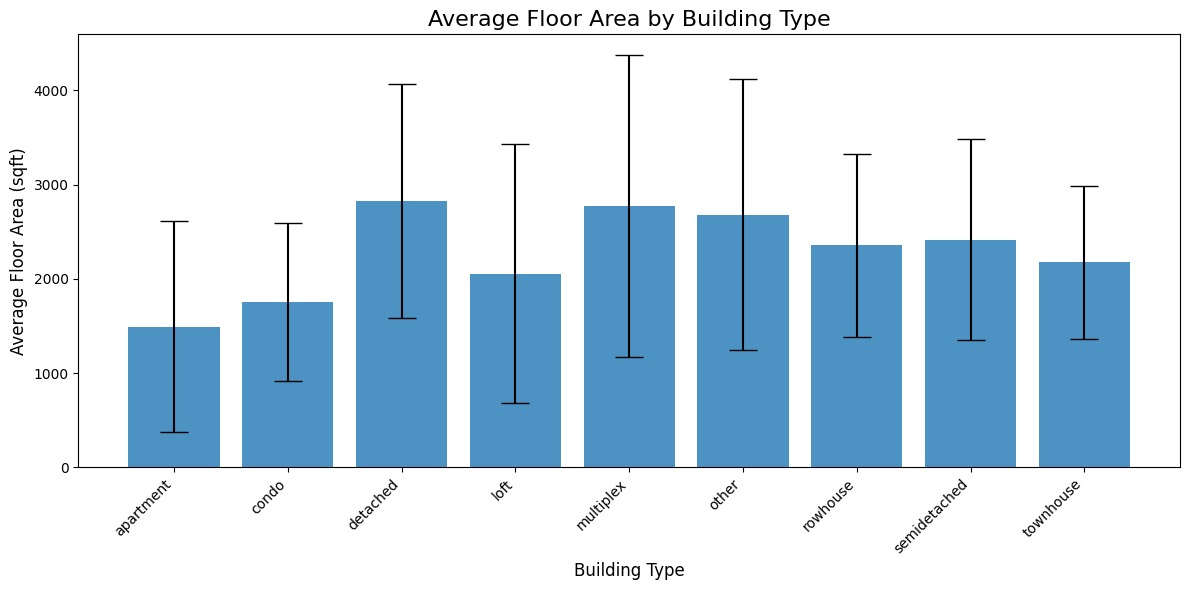

In [37]:
# Bar Plot: Average Floor Area by Building Type
plt.figure(figsize=(12, 6))  # Create a new figure with specified size

# Calculate mean and standard deviation of floor area for each building type
avg_floor_area = df.groupby('building_type')['floor_area_sqft'].mean()
std_floor_area = df.groupby('building_type')['floor_area_sqft'].std()

# Create an array of x-coordinates for the bars
x = range(len(avg_floor_area))

# Create the bar plot
plt.bar(x, avg_floor_area,  # x-coordinates and heights of bars
        yerr=std_floor_area,  # Error bar values
        align='center',  # Center the bars on their x-coordinates
        alpha=0.8,  # Set transparency of bars
        ecolor='black',  # Color of error bars
        capsize=10)  # Add caps to the error bars

# Customize the plot
plt.title('Average Floor Area by Building Type', fontsize=16)
plt.xlabel('Building Type', fontsize=12)
plt.ylabel('Average Floor Area (sqft)', fontsize=12)

# Set x-axis tick labels to building types, rotated for readability
plt.xticks(x, avg_floor_area.index, rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()

### Inferential Analysis

In [38]:
# import libraries that we need to conduct inferential statistics.
# We did not cover scipy in our lectures but now you know that you should get used to installing and using new libraries.

from scipy import stats

# if you get an ModuleNotFound error, install the libraries in your machine. instructions: https://scipy.org/install/
# more details about scipy.stats: https://docs.scipy.org/doc/scipy/reference/stats.html
# We are specifically interested in: https://docs.scipy.org/doc/scipy/reference/stats.html#hypothesis-tests-and-related-functions

In [39]:
print("\nT-test: Compare floor area of two building types")

# Select two building types for comparison (e.g., 'apartment' and 'house')
type1 = 'apartment'
type2 = 'detached'

group1 = df[df['building_type'] == type1]['floor_area_sqft']
group2 = df[df['building_type'] == type2]['floor_area_sqft']

# scipy.stats.ttest_ind: a test for the null hypothesis that 2 independent samples have identical 
# average (expected) values. 
# This test assumes that the populations have identical variances by default.
t_stat, p_value = stats.ttest_ind(group1, group2) 

print(f"T-test results for floor area between {type1} and {type2}:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



T-test: Compare floor area of two building types
T-test results for floor area between apartment and detached:
T-statistic: -48.06147330019834
P-value: 0.0


In [40]:
# Exercise - Compare floor area of two states.

# Select states for comparison (e.g., 'apartment' and 'house')
state1 = 'AZ'
state2 = 'CA'

group1 = df[df['province_state'] == state1]['floor_area_sqft']
group2 = df[df['province_state'] == state2]['floor_area_sqft']

# scipy.stats.ttest_ind: a test for the null hypothesis that 2 independent samples have identical 
# average (expected) values. 
# This test assumes that the populations have identical variances by default.
t_stat, p_value = stats.ttest_ind(group1, group2) 

print(f"T-test results for floor area between {type1} and {type2}:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-test results for floor area between apartment and detached:
T-statistic: 11.360985956872687
P-value: 1.0699124582756529e-29


In [41]:
# ANOVA: Compare building age across all building types
print("\nANOVA: Compare building age across all building types")

# Group data by building type
building_types = df['building_type'].unique()
age_groups = [df[df['building_type'] == bt]['building_age_yrs'] 
              for bt in building_types]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*age_groups) # Please be mindful of *args and **kwargs that we covered :)

print("ANOVA results for building age across building types:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Exercise - Compare building sqaure footage among 'detached', 'semi-detached', and 'apartments' statistically using ANOVA

# Interpret the ANOVA results
alpha = 0.05  # conventional significance level
if p_value < alpha:
    print("The p-value is less than 0.05, suggesting that there are statistically significant differences")
    print("in building ages among the different building types.")
else:
    print("The p-value is greater than or equal to 0.05, suggesting that there are no statistically significant")
    print("differences in building ages among the different building types.")



ANOVA: Compare building age across all building types
ANOVA results for building age across building types:
F-statistic: 4.782465149254063
p-value: 6.765455225603623e-06
The p-value is less than 0.05, suggesting that there are statistically significant differences
in building ages among the different building types.


In [42]:
# Exercise - Compare building sqaure footage among 'detached', 'semi-detached', and 'apartments' statistically using ANOVA
# ANOVA: Compare Square Footage Across House Types
print("\nANOVA: Compare Square Footage Across House Types")

# Filter the data for the three house types we're interested in
house_types = ['detached', 'semidetached', 'apartment']
filtered_df = df[df['building_type'].isin(house_types)]

# Group data by house type
sqft_groups = [filtered_df[filtered_df['building_type'] == ht]['floor_area_sqft'] for ht in house_types]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*sqft_groups)

print("ANOVA results for square footage across house types:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Interpret the ANOVA results
alpha = 0.05  # conventional significance level
if p_value < alpha:
    print("The p-value is less than 0.05, suggesting that there are statistically significant differences")
    print("in square footage among the different house types.")
else:
    print("The p-value is greater than or equal to 0.05, suggesting that there are no statistically significant")
    print("differences in square footage among the different house types.")



ANOVA: Compare Square Footage Across House Types
ANOVA results for square footage across house types:
F-statistic: 1193.6211652635018
p-value: 0.0
The p-value is less than 0.05, suggesting that there are statistically significant differences
in square footage among the different house types.
